In [ ]:
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import time
import json
from time import sleep
from typing import List, Optional, Tuple

In [ ]:
# import pandas as pd

# # Load the CSV files into DataFrames
# canara_df = pd.read_csv('canara_bank2023_2024.csv')
# union_df = pd.read_csv('union_bank2023_2024.csv')
# sbi_df = pd.read_csv('sbi_bank2023_2024.csv')

# # Display the first few rows of each DataFrame to understand their structure
# canara_df.head(), union_df.head(), sbi_df.head()

# # Now you can work with df1, df2, and df3 as DataFrames.


In [ ]:
# import matplotlib.pyplot as plt

# # Function to preprocess and aggregate data by month
# def preprocess_and_aggregate(df):
#     # Convert the 'at' column to datetime format
#     df['at'] = pd.to_datetime(df['at'])

#     # Extract year and month
#     df['year_month'] = df['at'].dt.to_period('M')

#     # Group by the extracted year and month, and calculate the mean score
#     monthly_avg = df.groupby('year_month')['score'].mean().reset_index()

#     return monthly_avg

# # Preprocess and aggregate each DataFrame
# canara_monthly_avg = preprocess_and_aggregate(canara_df)
# union_monthly_avg = preprocess_and_aggregate(union_df)
# sbi_monthly_avg = preprocess_and_aggregate(sbi_df)

# # Plotting the trends
# plt.figure(figsize=(12, 6))
# plt.plot(canara_monthly_avg['year_month'].astype(str), canara_monthly_avg['score'], label='Canara Bank')
# plt.plot(union_monthly_avg['year_month'].astype(str), union_monthly_avg['score'], label='Union Bank')
# plt.plot(sbi_monthly_avg['year_month'].astype(str), sbi_monthly_avg['score'], label='SBI')

# plt.title('Average Monthly Ratings (July 2023 - July 2024)')
# plt.xlabel('Month')
# plt.ylabel('Average Rating')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# # Display the plot
# plt.show()


In [ ]:
import pandas as pd

# File paths
file1 = 'canara bank.csv'
file2 = 'union_bank2023_2024.csv'
file3 = 'sbi_bank2023_2024.csv'

# Read the CSV files
df_canara = pd.read_csv(file1)
df_union = pd.read_csv(file2)
df_sbi = pd.read_csv(file3)

# Display the first few rows of each dataframe to understand the structure
df_canara.head(), df_union.head(), df_sbi.head()


(                               reviewId              userName  \
 0  fd492344-ef7b-4a0d-9bf6-9bcfdf1f299f          usama daduji   
 1  944b705c-1335-480a-a456-9b5ed50b7c95              sunder R   
 2  1045f757-8bf6-4963-a764-b35becf88db3        gouse Muhammed   
 3  d68e01c9-48f8-42ac-bd42-75372d95fd9f  Chandrika Jagadeesan   
 4  f801b0b8-a39b-4b39-8ce6-1b43e174b8b8            J.P Apurva   
 
                                              content  score  thumbsUpCount  \
 0  UPI doesn't work properly.. don't make payment...    2.0            0.0   
 1                                         Don't like    1.0            0.0   
 2                                        Not working    2.0            0.0   
 3                  Thank you canara ai1-mobile bank.    5.0            0.0   
 4                                          Very poor    1.0            0.0   
 
   reviewCreatedVersion                   at appVersion  
 0               3.5.35  2024-08-08 08:06:11     3.5.35  
 1        

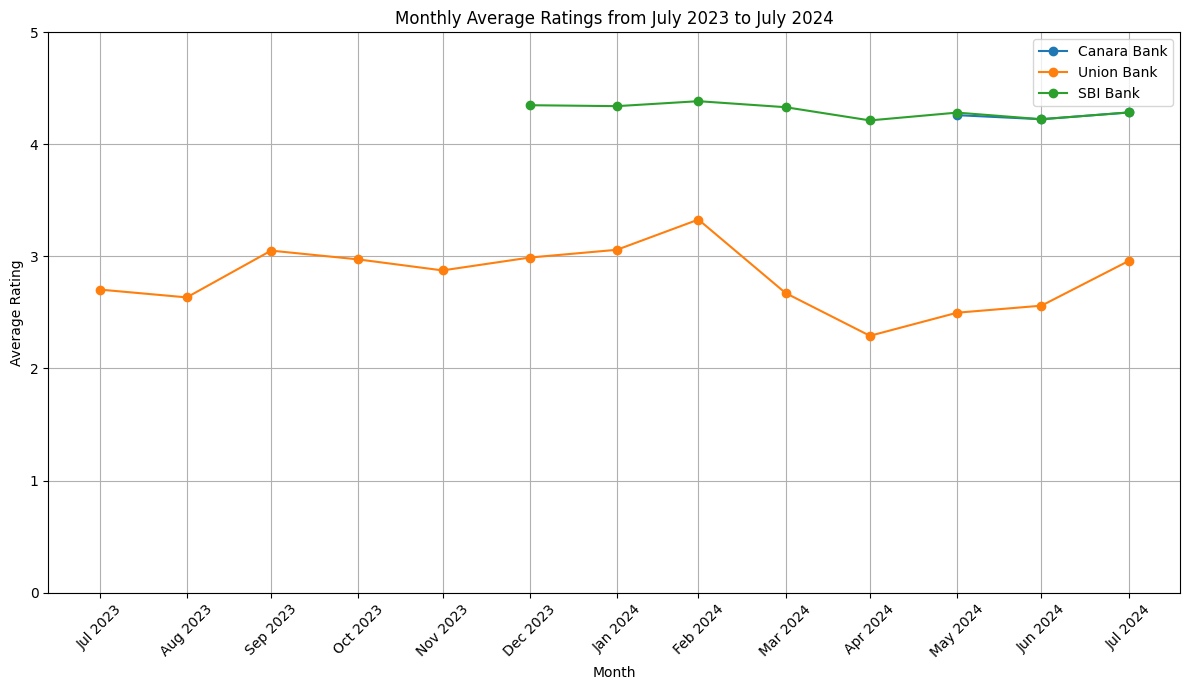

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'at' column to datetime format
df_canara['at'] = pd.to_datetime(df_canara['at'])
df_union['at'] = pd.to_datetime(df_union['at'])
df_sbi['at'] = pd.to_datetime(df_sbi['at'])

# Resample the data by month and calculate the average rating
canara_monthly = df_canara.resample('M', on='at').score.mean()
union_monthly = df_union.resample('M', on='at').score.mean()
sbi_monthly = df_sbi.resample('M', on='at').score.mean()

# Create a complete date range from July 2023 to July 2024
full_date_range = pd.date_range(start='2023-07-01', end='2024-07-31', freq='M')

# Reindex the monthly data with the full date range
canara_monthly = canara_monthly.reindex(full_date_range)
union_monthly = union_monthly.reindex(full_date_range)
sbi_monthly = sbi_monthly.reindex(full_date_range)

# Plot the trends
plt.figure(figsize=(12, 7))

plt.plot(canara_monthly.index, canara_monthly, marker='o', label='Canara Bank')
plt.plot(union_monthly.index, union_monthly, marker='o', label='Union Bank')
plt.plot(sbi_monthly.index, sbi_monthly, marker='o', label='SBI Bank')

plt.title('Monthly Average Ratings from July 2023 to July 2024')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(canara_monthly.index, canara_monthly.index.strftime('%b %Y'), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


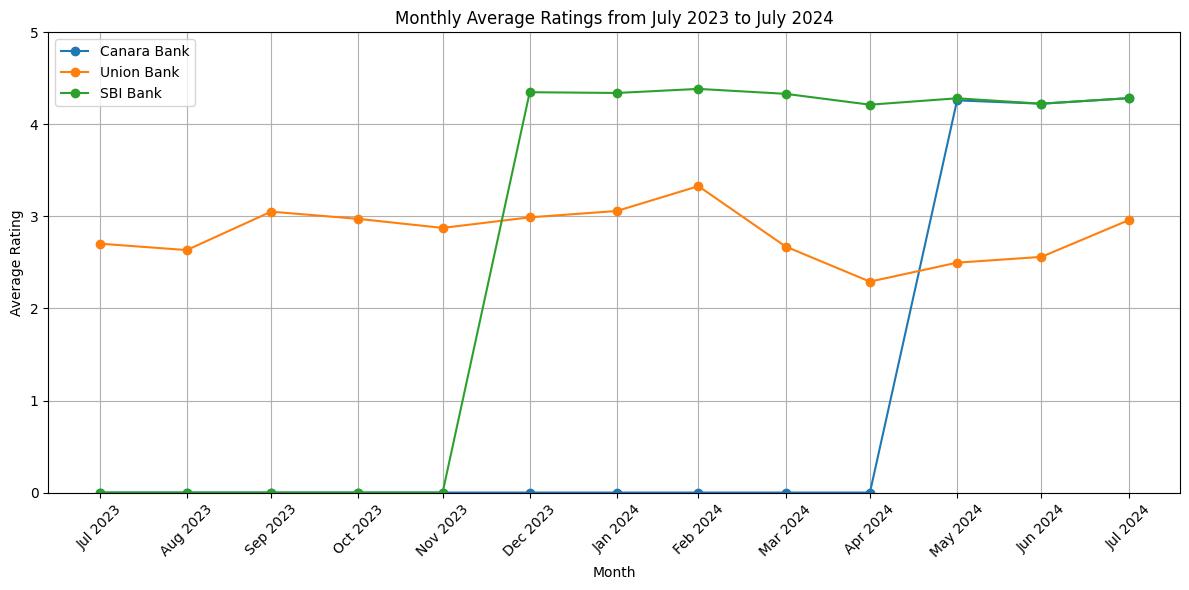

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'at' column to datetime format
df_canara['at'] = pd.to_datetime(df_canara['at'])
df_union['at'] = pd.to_datetime(df_union['at'])
df_sbi['at'] = pd.to_datetime(df_sbi['at'])

# Round the ratings to the nearest whole number
df_canara['score'] = df_canara['score'].round()
df_union['score'] = df_union['score'].round()
df_sbi['score'] = df_sbi['score'].round()

# Resample the data by month and calculate the average rating
canara_monthly = df_canara.resample('M', on='at').score.mean()
union_monthly = df_union.resample('M', on='at').score.mean()
sbi_monthly = df_sbi.resample('M', on='at').score.mean()

# Create a complete date range from July 2023 to July 2024
full_date_range = pd.date_range(start='2023-07-01', end='2024-07-31', freq='M')

# Reindex the monthly data with the full date range and fill missing values
canara_monthly = canara_monthly.reindex(full_date_range, fill_value=0)
union_monthly = union_monthly.reindex(full_date_range, fill_value=0)
sbi_monthly = sbi_monthly.reindex(full_date_range, fill_value=0)

# Plot the trends
plt.figure(figsize=(12, 6))

plt.plot(canara_monthly.index, canara_monthly, marker='o', label='Canara Bank')
plt.plot(union_monthly.index, union_monthly, marker='o', label='Union Bank')
plt.plot(sbi_monthly.index, sbi_monthly, marker='o', label='SBI Bank')

plt.title('Monthly Average Ratings from July 2023 to July 2024')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(canara_monthly.index, canara_monthly.index.strftime('%b %Y'), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd

# Load the CSV files
sbi_data = pd.read_csv('sbi bank.csv')
canara_data = pd.read_csv('canara_bank2023_2024.csv')
union_data = pd.read_csv('union_bank2023_2024.csv')

# Display the first few rows of each dataset to understand their structure
sbi_data.head(), canara_data.head(), union_data.head()


(                               reviewId             userName  \
 0  e91361cf-1574-4aea-8ea9-d55c89e1b198        Gulshan Abrol   
 1  e2eac035-f76b-4ec4-8595-3af9c9a2d0fa       Dewanshi Ghosh   
 2  fc450284-46d5-4f1d-a542-31b7e7e9f296             SN DUBEY   
 3  69d9ba85-adaa-4bfb-887f-213fa580b3ad     Ali Akbar Sayyed   
 4  9c8972b4-b0c4-4981-80e2-00362660c45f  Sudhir Kumar Thakur   
 
                                              content  score  thumbsUpCount  \
 0               Nice application Thank you developer    5.0            0.0   
 1  It's can be better by using more features and ...    4.0            0.0   
 2                                 Excellent Services    5.0            0.0   
 3                                          Okay okay    5.0            0.0   
 4                              Superb, user friendly    5.0            0.0   
 
   reviewCreatedVersion                   at appVersion  
 0               3.5.35  2024-08-08 09:32:20     3.5.35  
 1              

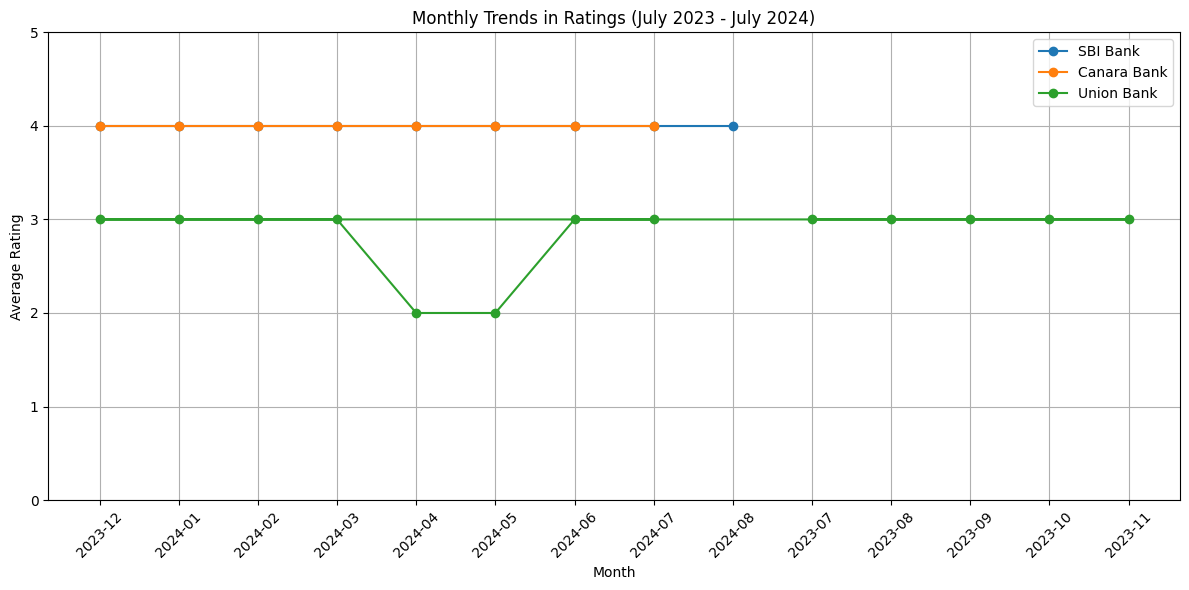

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'at' column to datetime format
sbi_data['at'] = pd.to_datetime(sbi_data['at'])
canara_data['at'] = pd.to_datetime(canara_data['at'])
union_data['at'] = pd.to_datetime(union_data['at'])

# Extract month and year for grouping
sbi_data['month_year'] = sbi_data['at'].dt.to_period('M')
canara_data['month_year'] = canara_data['at'].dt.to_period('M')
union_data['month_year'] = union_data['at'].dt.to_period('M')

# Group by month and year and calculate the mean score
sbi_trends = sbi_data.groupby('month_year')['score'].mean().round(0)
canara_trends = canara_data.groupby('month_year')['score'].mean().round(0)
union_trends = union_data.groupby('month_year')['score'].mean().round(0)

# Plotting the trends
plt.figure(figsize=(12, 6))

plt.plot(sbi_trends.index.astype(str), sbi_trends, marker='o', label='SBI Bank')
plt.plot(canara_trends.index.astype(str), canara_trends, marker='o', label='Canara Bank')
plt.plot(union_trends.index.astype(str), union_trends, marker='o', label='Union Bank')

plt.title('Monthly Trends in Ratings (July 2023 - July 2024)')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


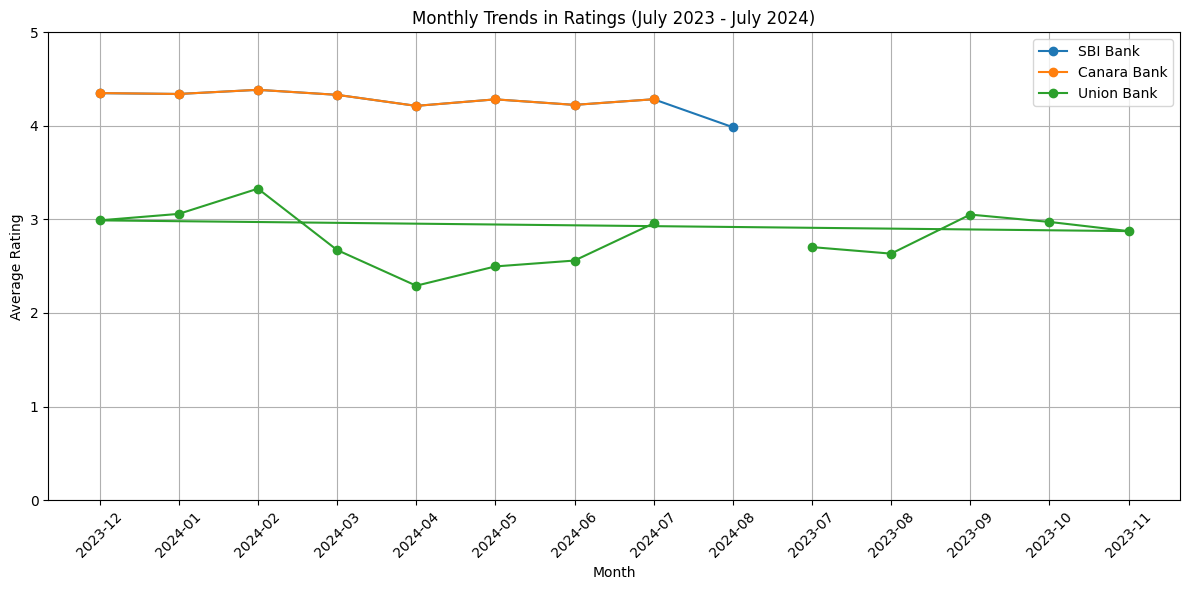

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
sbi_data = pd.read_csv('sbi bank.csv')
canara_data = pd.read_csv('canara_bank2023_2024.csv')
union_data = pd.read_csv('union_bank2023_2024.csv')

# Convert the 'at' column to datetime format
sbi_data['at'] = pd.to_datetime(sbi_data['at'])
canara_data['at'] = pd.to_datetime(canara_data['at'])
union_data['at'] = pd.to_datetime(union_data['at'])

# Round the ratings to the nearest whole number
sbi_data['score'] = sbi_data['score'].round()
canara_data['score'] = canara_data['score'].round()
union_data['score'] = union_data['score'].round()

# Extract month and year for grouping
sbi_data['month_year'] = sbi_data['at'].dt.to_period('M')
canara_data['month_year'] = canara_data['at'].dt.to_period('M')
union_data['month_year'] = union_data['at'].dt.to_period('M')

# Group by month and year and calculate the mean score
sbi_trends = sbi_data.groupby('month_year')['score'].mean()
canara_trends = canara_data.groupby('month_year')['score'].mean()
union_trends = union_data.groupby('month_year')['score'].mean()

# Plotting the trends
plt.figure(figsize=(12, 6))

plt.plot(sbi_trends.index.astype(str), sbi_trends, marker='o', label='SBI Bank')
plt.plot(canara_trends.index.astype(str), canara_trends, marker='o', label='Canara Bank')
plt.plot(union_trends.index.astype(str), union_trends, marker='o', label='Union Bank')

plt.title('Monthly Trends in Ratings (July 2023 - July 2024)')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Set y-axis limits for whole number ratings
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

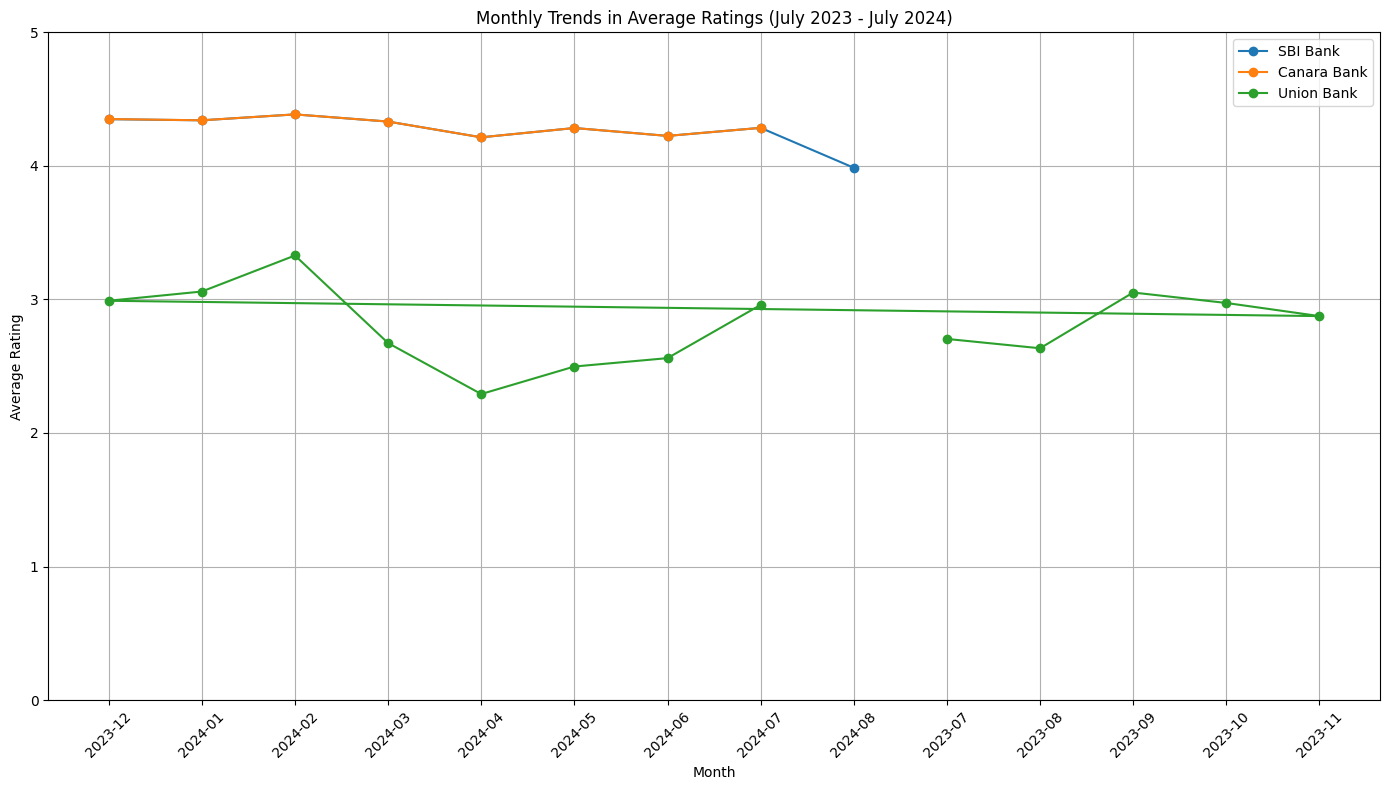

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
sbi_data = pd.read_csv('sbi bank.csv')
canara_data = pd.read_csv('canara_bank2023_2024.csv')
union_data = pd.read_csv('union_bank2023_2024.csv')

# Convert the 'at' column to datetime format
sbi_data['at'] = pd.to_datetime(sbi_data['at'])
canara_data['at'] = pd.to_datetime(canara_data['at'])
union_data['at'] = pd.to_datetime(union_data['at'])

# Round the ratings to the nearest whole number
sbi_data['score'] = sbi_data['score'].round()
canara_data['score'] = canara_data['score'].round()
union_data['score'] = union_data['score'].round()

# Extract month and year for grouping
sbi_data['month_year'] = sbi_data['at'].dt.to_period('M')
canara_data['month_year'] = canara_data['at'].dt.to_period('M')
union_data['month_year'] = union_data['at'].dt.to_period('M')

# Group by month and year and calculate the mean score
sbi_trends = sbi_data.groupby('month_year')['score'].mean()
canara_trends = canara_data.groupby('month_year')['score'].mean()
union_trends = union_data.groupby('month_year')['score'].mean()

# Plotting the trends
plt.figure(figsize=(14, 8))

plt.plot(sbi_trends.index.astype(str), sbi_trends, marker='o', label='SBI Bank')
plt.plot(canara_trends.index.astype(str), canara_trends, marker='o', label='Canara Bank')
plt.plot(union_trends.index.astype(str), union_trends, marker='o', label='Union Bank')

plt.title('Monthly Trends in Average Ratings (July 2023 - July 2024)')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Set y-axis limits for whole number ratings
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()